# Predicting Building Damage from Earthquakes

**Problem Statement:**</br>
To predict the damage grade for the building from an earthquake. 

**Content:**</br>
It is a multiclass supervised learning problem.For the model training purpose we are using earthquake data collected from an </br>open portal. .our target variable has 5 classes, labelled 'Grade 1':'Grade 5' which each represent the different scale of </br>damage sustained to the building.</br>

**Acknoledgement:**</br>
This Data collected from Nepal earthquake open portal.The earthquake in question was 7.8 in magnitude and occured near the </br>Gorkha district of Gandaki Pradesh, Nepal.

<h2>1. Data Collection</h2>

In [1]:
# Importing libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import scipy
import math
from scipy.stats.mstats import winsorize
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read the dataset
df=pd.read_csv("csv_building_structure.csv")

# 2.Data Understanding

In [4]:
# Check the first 3 rows
df.head(3)

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
0,1.200000e+11,12,1207,120703,1,9,288.0,9,Flat,Other,...,0,0,0,0,0,1,0,0,0,Grade 3
1,1.200000e+11,12,1207,120703,1,15,364.0,9,Flat,Other,...,0,0,0,0,0,1,0,0,0,Grade 5
2,1.200000e+11,12,1207,120703,1,20,384.0,9,Flat,Other,...,0,0,0,0,0,0,0,0,0,Grade 2


In [5]:
# Check the last 3 rows
df.tail(3)

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
762103,3.670000e+11,36,3603,360302,2,35,342.0,18,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 5
762104,3.670000e+11,36,3603,360302,2,19,306.0,18,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 5
762105,3.670000e+11,36,3603,360302,2,12,840.0,18,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 5


In [6]:
# Check for the data type of the data with respect to columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 27 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   building_id                             762106 non-null  float64
 1   district_id                             762106 non-null  int64  
 2   vdcmun_id                               762106 non-null  int64  
 3   ward_id                                 762106 non-null  int64  
 4   count_floors_pre_eq                     762106 non-null  int64  
 5   age_building                            762106 non-null  int64  
 6   plinth_area_sq_ft                       762078 non-null  float64
 7   height_ft_pre_eq                        762106 non-null  int64  
 8   land_surface_condition                  762106 non-null  object 
 9   foundation_type                         762106 non-null  object 
 10  roof_type                               7620

In [7]:
# Check the shape of the data
df.shape

(762106, 27)

In [8]:
#columns
df.columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'damage_grade'],
      dtype='object')

In [9]:
#data types
df.dtypes

building_id                               float64
district_id                                 int64
vdcmun_id                                   int64
ward_id                                     int64
count_floors_pre_eq                         int64
age_building                                int64
plinth_area_sq_ft                         float64
height_ft_pre_eq                            int64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64
has_superstructure_mud_mortar_brick         int64


In [10]:
# Categorical column
cat_col=df.select_dtypes(include="object").columns
cat_col

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'damage_grade'],
      dtype='object')

In [11]:
# Numerical column
num_col=df.select_dtypes(exclude="object").columns
num_col

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other'],
      dtype='object')

In [12]:
# Categorical Data
df[cat_col].head(3)

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,damage_grade
0,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Grade 3
1,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Grade 5
2,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Grade 2


In [13]:
# Numerical Data
df[num_col].head(3)

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
0,1.200000e+11,12,1207,120703,1,9,288.0,9,0,1,0,0,0,0,0,1,0,0,0
1,1.200000e+11,12,1207,120703,1,15,364.0,9,0,1,0,0,0,0,0,1,0,0,0
2,1.200000e+11,12,1207,120703,1,20,384.0,9,0,1,0,0,0,0,0,0,0,0,0


In [14]:
# Statistics of the dataset(numeric)
df.describe()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
count,7.621060e+05,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762078.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000
mean,2.607908e+11,25.767835,2582.688357,258274.277335,2.087783,24.326405,406.673039,16.049372,0.042401,0.800271,0.035121,0.015815,0.022961,0.071525,0.258766,0.080482,0.039794,0.016386,0.012026
std,5.801505e+10,5.807555,581.172767,58117.348412,0.655101,65.043704,226.782716,5.493878,0.201502,0.399797,0.184086,0.124761,0.149780,0.257701,0.437957,0.272039,0.195474,0.126955,0.109001
min,1.200000e+11,12.000000,1201.000000,120101.000000,1.000000,0.000000,70.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.220000e+11,22.000000,2204.000000,220402.000000,2.000000,9.000000,280.000000,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.460000e+11,24.000000,2410.000000,241004.000000,2.000000,16.000000,358.000000,16.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.040000e+11,30.000000,3010.000000,301006.000000,2.000000,27.000000,470.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,3.670000e+11,36.000000,3611.000000,361108.000000,9.000000,999.000000,5000.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Insight: </br>
    1.By looking into the above table , We can see that theere are wide range of values for some Feature</br>
    2. So we need to do pull down those values to the same range by using standisation or Normalisation</br>

In [15]:
df.describe(include='object').T

,count,unique,top,freq
land_surface_condition,762106,3,Flat,631675
foundation_type,762106,5,Mud mortar-Stone/Brick,628716
roof_type,762080,3,Bamboo/Timber-Light roof,503722
ground_floor_type,762106,5,Mud,618217
other_floor_type,762106,4,TImber/Bamboo-Mud,486907
position,762105,4,Not attached,604453
plan_configuration,762105,10,Rectangular,731257
damage_grade,762094,5,Grade 5,275766


In [16]:
#null values in the dataset
df.isna().sum()

building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
age_building                               0
plinth_area_sq_ft                         28
height_ft_pre_eq                           0
land_surface_condition                     0
foundation_type                            0
roof_type                                 26
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_superstructure_cement_mortar_brick     0
has_superstructure_timber                  0
has_supers

# 3. Data Cleaning

# 3a. Handling of Null Values

In [17]:
# Check for the Missing Values
df.isna().sum()

building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
age_building                               0
plinth_area_sq_ft                         28
height_ft_pre_eq                           0
land_surface_condition                     0
foundation_type                            0
roof_type                                 26
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_superstructure_cement_mortar_brick     0
has_superstructure_timber                  0
has_supers

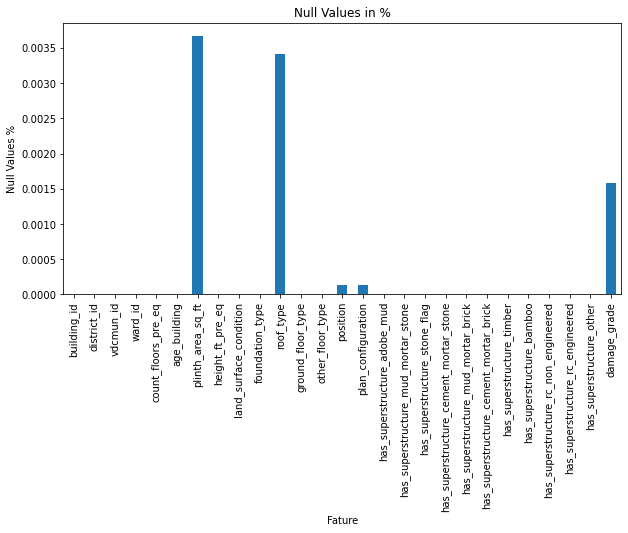

In [18]:
# in Percentage
plt.figure(figsize=(10,5))
((df.isnull().sum()/len(df))*100).plot(kind='bar')
plt.title("Null Values in %")
plt.xlabel('Fature')
plt.ylabel('Null Values %')
plt.show()

Note: We can go for droping the null values. But here, I am handling null values in 2 features to include the steps

In [19]:
# we will drop the null values in the damage grade, position & plan Configuration columns
col_to_drop=["position","plan_configuration","damage_grade"]
for col in col_to_drop:
    i=df[df[col].isnull()].index
    print(i)

Int64Index([131652], dtype='int64')
Int64Index([131652], dtype='int64')
Int64Index([ 83766, 131558, 131579, 131627, 131629, 131640, 131652, 131654,
            131655, 131656, 131929, 131932],
           dtype='int64')


In [20]:
index=[83766, 131558, 131579, 131627, 131629, 131640, 131652, 131654,131655, 131656, 131929, 131932]

In [21]:
for i in index:
    df.drop(i,axis=0,inplace=True)

In [22]:
df["damage_grade"].value_counts()

Grade 5    275766
Grade 4    183844
Grade 3    136412
Grade 2     87257
Grade 1     78815
Name: damage_grade, dtype: int64

In [23]:
df.isna().sum()

building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
age_building                               0
plinth_area_sq_ft                         28
height_ft_pre_eq                           0
land_surface_condition                     0
foundation_type                            0
roof_type                                 26
ground_floor_type                          0
other_floor_type                           0
position                                   0
plan_configuration                         0
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_superstructure_cement_mortar_brick     0
has_superstructure_timber                  0
has_supers

Text(0.5, 1.0, 'disribustion of plinth_area_sq_ft')

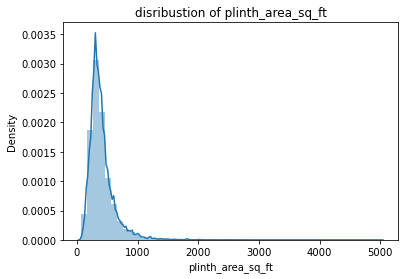

In [24]:
#Handling of null values in plinth_area_sq_ft,roof_type
plt.Figure(figsize=(18,8))
df["plinth_area_sq_ft"].unique()
sns.distplot(df["plinth_area_sq_ft"])
plt.title("disribustion of plinth_area_sq_ft")

Insight: Since its a skewed data, We will go for capping with median values

In [25]:
df["roof_type"].value_counts()
df["roof_type"].mode()
df["roof_type"].dtype
df["plinth_area_sq_ft"].dtype

dtype('float64')

In [26]:
df.groupby("roof_type")["plinth_area_sq_ft"].median()

roof_type
Bamboo/Timber-Heavy roof    360.0
Bamboo/Timber-Light roof    345.0
RCC/RB/RBC                  700.0
Name: plinth_area_sq_ft, dtype: float64

In [27]:
def impute_plinth_area(cols):
    rtype=cols[0]
    plinth=cols[1]
    if pd.isnull(plinth):
        if rtype == "Bamboo/Timber-Heavy roof" :
            return 360
        elif rtype == "Bamboo/Timber-Light roof" :
            return 345
        elif rtype == "RCC/RB/RBC" :
            return 700
    else:
        return plinth

In [28]:
df["roof_type"].unique()

array(['Bamboo/Timber-Light roof', 'Bamboo/Timber-Heavy roof', nan,
       'RCC/RB/RBC'], dtype=object)

In [29]:
# handle the missing values based on type of the column

df["roof_type"]=df["roof_type"].fillna(df["roof_type"].mode()[0])

In [30]:
df["plinth_area_sq_ft"]=df[["roof_type","plinth_area_sq_ft"]].apply(impute_plinth_area,axis=1)

In [31]:
df.isna().sum()

building_id                               0
district_id                               0
vdcmun_id                                 0
ward_id                                   0
count_floors_pre_eq                       0
age_building                              0
plinth_area_sq_ft                         0
height_ft_pre_eq                          0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [32]:
df["plinth_area_sq_ft"].value_counts()

300.0     27655
450.0     21321
400.0     19961
350.0     19163
360.0     14967
          ...  
2082.0        1
4470.0        1
3410.0        1
1749.0        1
2247.0        1
Name: plinth_area_sq_ft, Length: 2129, dtype: int64

# 3b. Handling of duplicate Rows

In [33]:
#To check the duplicates
df[df.duplicated()]

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
262,1.200000e+11,12,1207,120703,2,3,322.0,16,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 1
348,1.200000e+11,12,1207,120703,1,26,322.0,9,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 3
373,1.200000e+11,12,1207,120703,2,10,459.0,15,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 1
377,1.200000e+11,12,1207,120703,2,15,459.0,15,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 2
378,1.200000e+11,12,1207,120703,2,24,459.0,15,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762037,3.670000e+11,36,3603,360302,2,5,360.0,18,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 5
762047,3.670000e+11,36,3603,360302,2,80,483.0,18,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 5
762078,3.670000e+11,36,3603,360302,2,20,378.0,18,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 5
762087,3.670000e+11,36,3603,360302,2,35,550.0,18,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 5


In [34]:
# Selecting duplicate rows except first
# occurrence based on all columns
df.drop_duplicates(keep='first',inplace=True)

In [35]:
df.shape

(723524, 27)

# 3c. Changing the data type of Height and age into float type

In [36]:
df["height_ft_pre_eq"]=df["height_ft_pre_eq"].astype("float64")
df["age_building"]=df["age_building"].astype("float64")

In [37]:
df.dtypes

building_id                               float64
district_id                                 int64
vdcmun_id                                   int64
ward_id                                     int64
count_floors_pre_eq                         int64
age_building                              float64
plinth_area_sq_ft                         float64
height_ft_pre_eq                          float64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64
has_superstructure_mud_mortar_brick         int64


<h2>4.Expolratory Data Analysis</h2>

**Checking how balanced our dataset is**

In [38]:
df["damage_grade"].value_counts()


Grade 5    253777
Grade 4    175797
Grade 3    131894
Grade 2     85458
Grade 1     76598
Name: damage_grade, dtype: int64

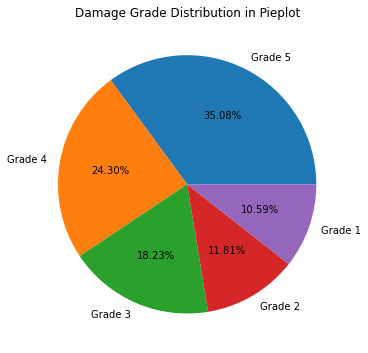

In [39]:
# First we will checkhow balanced our datasets really is
plt.figure(figsize=(10,5))

# plt.subplot(1,2,1)
# sns.countplot(x="damage_grade",data=df,order = ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5'])
# plt.title("Damage Grade Distribution in Barplot")
# plt.xticks(rotation=90)
# plt.tight_layout()

labels=["Grade 5","Grade 4","Grade 3","Grade 2","Grade 1"]
plt.subplot(1,2,2)
plt.pie(df["damage_grade"].value_counts().values,labels=labels,autopct='%.2f%%')
plt.title("Damage Grade Distribution in Pieplot")
plt.tight_layout()

Insight:</br> 
    1. From the above plot we can see that , our dataset is very imbalanced</br>
    2.It might be because of the intensity of earthquake</br>
    3.since this data collected after the earthquake and its very likely that damge</br> of the building is highly correlated to the intensity of earthquake</br>
    4. decision trees and random forests algorithms are extremely sensitive to imbalanced data.</br>
    5. We will make the data into balanced data before modeling

**Checking the skewness using Histogram**

		Skewness of the Continous Features


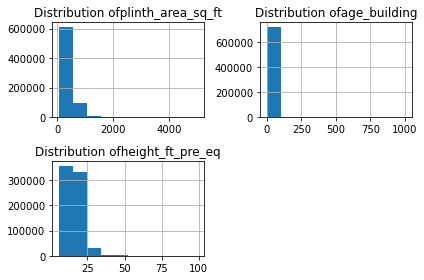

In [40]:
array=["plinth_area_sq_ft","age_building","height_ft_pre_eq"]
print("\t\tSkewness of the Continous Features")
for i in enumerate(array):
    plt.subplot(2,2,i[0]+1)
    df[i[1]].hist()
    a=str(i[1])
    plt.title("Distribution of"+a)
    plt.tight_layout()

Insight:</br>
    1. We can see that above features are right skewed</br>
    2. Most of teh data falls to the right</br>
    3. tail is longer to the right side

**Checking the Outliers using Boxplot**

	Checking the presence of Outliers in the Continues Featues


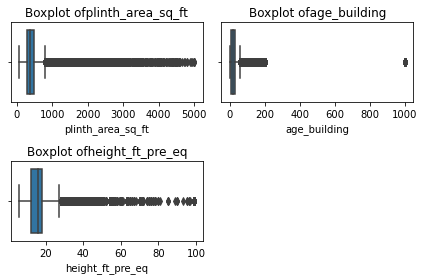

In [41]:
array=["plinth_area_sq_ft","age_building","height_ft_pre_eq"]
print("\tChecking the presence of Outliers in the Continues Featues")
for i in enumerate(array):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(df[i[1]])
    a=str(i[1])
    plt.title("Boxplot of"+a)
    plt.tight_layout()

Insight:</br>
1. We can see that above continous features have outliers</br>
2. these outliers are positive type</br>
3. We can see age of building has value 1000, that we need to look further</br>
4. We will handle these outliers in preporocessing section</br>

**Correlation using scatter plot**

Text(0.5, 1.0, 'Plinth_area vs Height')

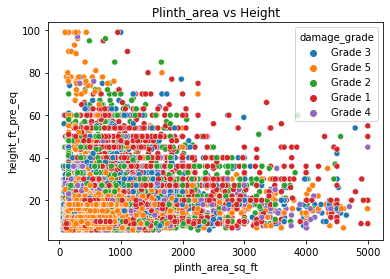

In [42]:
sns.scatterplot(x="plinth_area_sq_ft",y="height_ft_pre_eq",data=df,hue="damage_grade")
plt.title("Plinth_area vs Height")

Insight:</br>
    1. Plinth_area and Height are very scattered<br>
    2. No linear relation between these 2 features

**Correlation of numerical features using Heatmap**

In [43]:
# correlation between features using Heatmap
df_corr=df.copy()

In [44]:
df_corr.drop(["building_id","district_id","vdcmun_id","ward_id"],axis=1,inplace=True)

In [45]:
df_corr.drop(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration'],axis=1,inplace=True)

Text(0.5, 1.0, 'Correlation between Numerical Features')

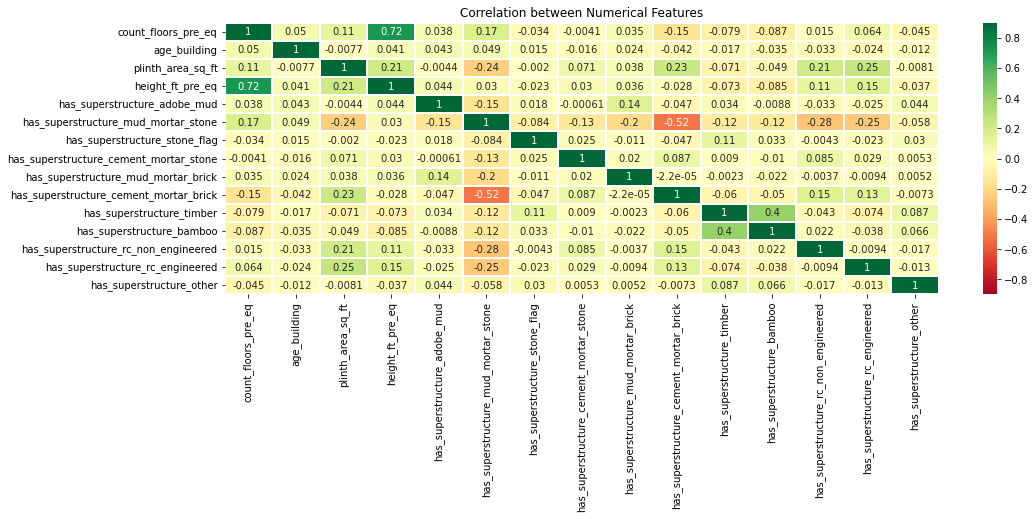

In [46]:
corr_matrix=df_corr.corr()
plt.figure(figsize=(16,5))
sns.heatmap(corr_matrix,linewidths=0.2,cmap='RdYlGn',annot=True,vmin=-0.9,vmax=0.9)
plt.title("Correlation between Numerical Features")

Insight: There is no High Positive & Negative Correlated Features

In [47]:
df_cat=df[cat_col]
df_cat.drop("damage_grade",axis=1,inplace=True)

In [48]:
cat_col

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'damage_grade'],
      dtype='object')

**Correlation between Categorical Features(land_surface_condition and damage_grade)**

In [49]:
# Correlation between land_surface_condition and damage_grade

data_Crosstab=pd.crosstab(index=df["land_surface_condition"], columns=df['damage_grade'])
data_Crosstab

damage_grade,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5
land_surface_condition,,,,,
Flat,66801,71556,107289,142053,210684
Moderate slope,7914,11636,20175,27512,34130
Steep slope,1883,2266,4430,6232,8963


Insight: </br>
1. From above table we can conclude that damage grade is highly correlated with Flat type land_surface condition</br>
2. But the fact is, Most of land type in Nepal is Falt type

**Plots to see the relation Between descrete numerical features and our response variable**

Count of Floor vs Damage Grade

Text(0.5, 1.0, 'Distribution of Damage Grade by count_floors_pre_eq')

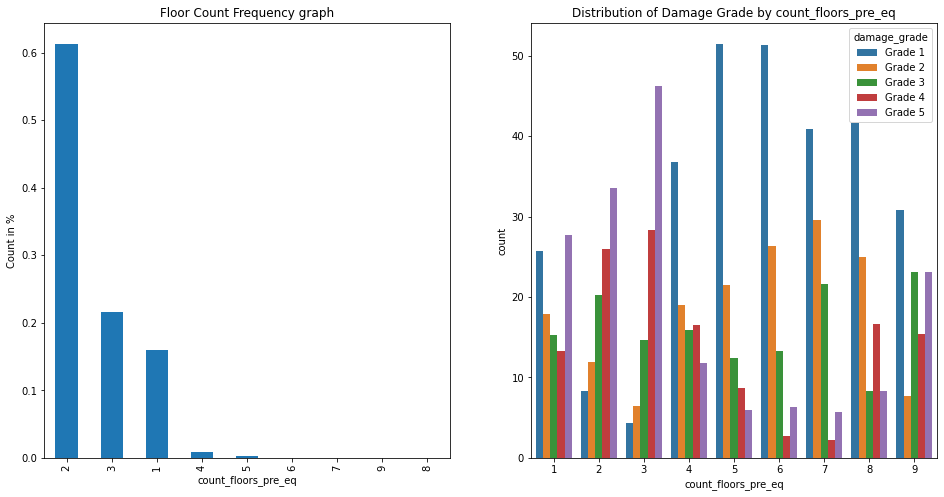

In [50]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
ax = df['count_floors_pre_eq'].value_counts(normalize=True)
ax.plot(kind='bar')
plt.xlabel("count_floors_pre_eq")
plt.ylabel("Count in %")
plt.title("Floor Count Frequency graph")

plt.subplot(1,2,2)
ax = df.groupby(['count_floors_pre_eq','damage_grade']).size().reset_index(name='count')
ax=ax.set_index(["count_floors_pre_eq","damage_grade"])
ax=ax.groupby(level=0).apply(lambda x: 100* x/float(x.sum())).reset_index()
sns.barplot(data=ax,x='count_floors_pre_eq',y='count',hue='damage_grade')
plt.title("Distribution of Damage Grade by count_floors_pre_eq")

Insight:</br>
    
    

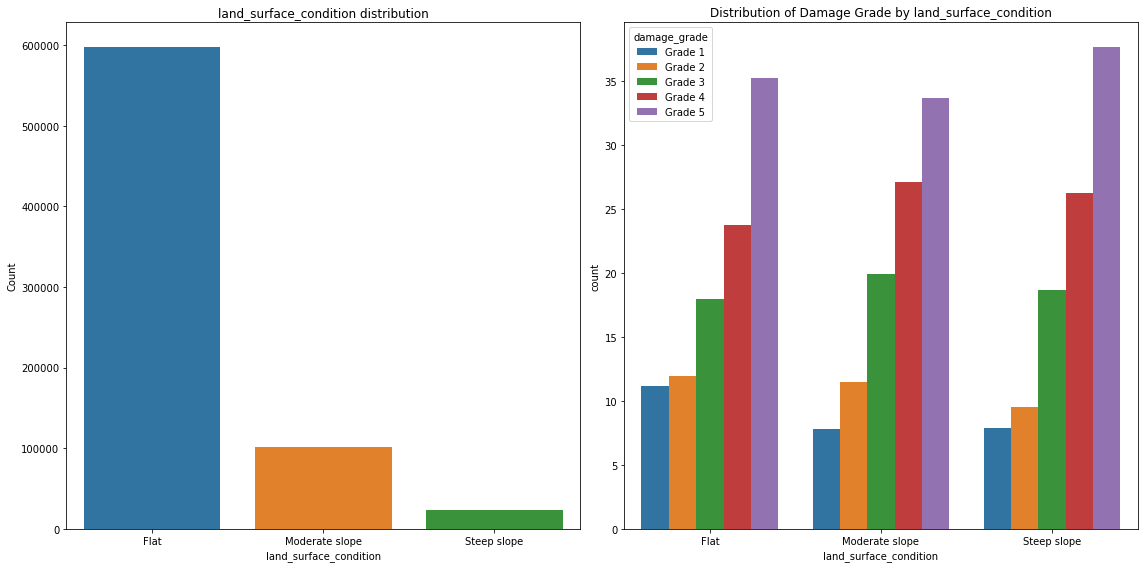

In [51]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(df["land_surface_condition"])
plt.title("land_surface_condition distribution")
plt.xlabel("land_surface_condition")
plt.ylabel("Count")


plt.subplot(1,2,2)
ax = df.groupby(['land_surface_condition','damage_grade']).size().reset_index(name='count')
ax=ax.set_index(["land_surface_condition","damage_grade"])
ax=ax.groupby(level=0).apply(lambda x: 100* x/float(x.sum())).reset_index()
sns.barplot(data=ax,x='land_surface_condition',y='count',hue='damage_grade')
plt.title("Distribution of Damage Grade by land_surface_condition")                 
plt.tight_layout()


Insight:</br>
    1. Most of the Land surface is of flat type</br>
    2. earthquake had same impact on all the 3 land surface types</br>

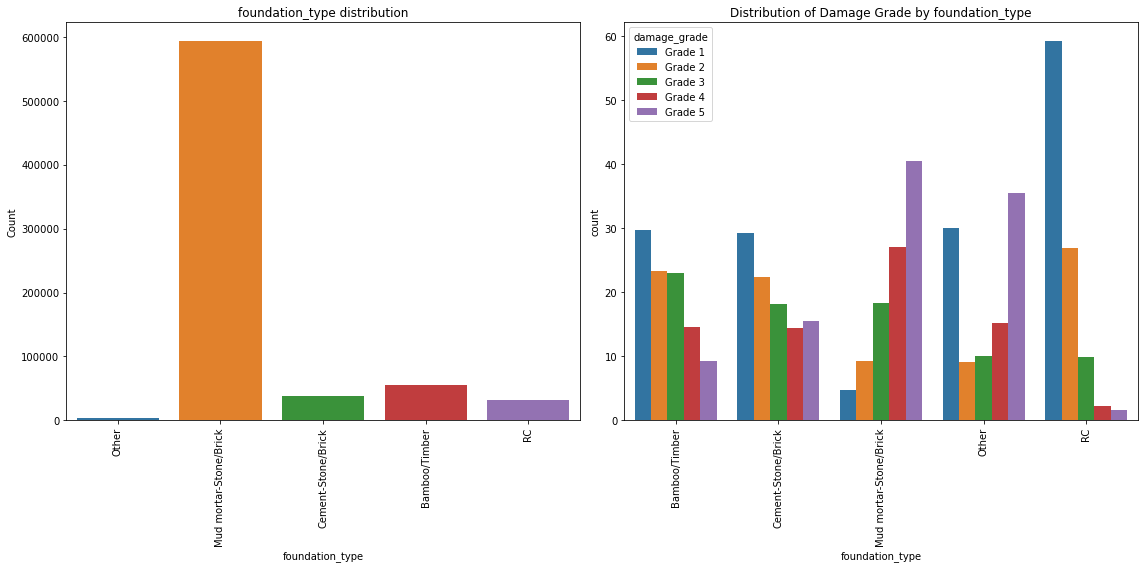

In [52]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(df["foundation_type"])
plt.title("foundation_type distribution")
plt.xlabel("foundation_type")
plt.ylabel("Count")
plt.xticks(rotation=90)


plt.subplot(1,2,2)
ax = df.groupby(['foundation_type','damage_grade']).size().reset_index(name='count')
ax=ax.set_index(["foundation_type","damage_grade"])
ax=ax.groupby(level=0).apply(lambda x: 100* x/float(x.sum())).reset_index()
sns.barplot(data=ax,x='foundation_type',y='count',hue='damage_grade')
plt.title("Distribution of Damage Grade by foundation_type")       
plt.xticks(rotation=90)
plt.tight_layout()

Insight:</br>
    1. Most of the foundation type observed in Nepal are of Mud mortar-Stone/Brick</br>
    2. earthquake had hight effect on Mud mortar-Stone/Brick foundadtion type

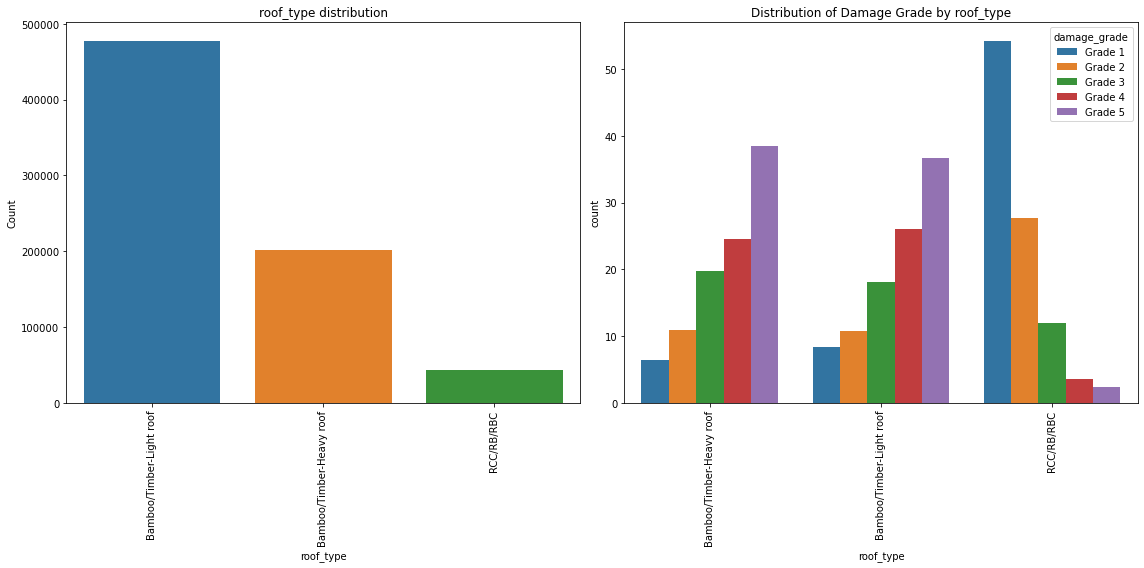

In [53]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(df["roof_type"])
plt.title("roof_type distribution")
plt.xlabel("roof_type")
plt.ylabel("Count")
plt.xticks(rotation=90)


plt.subplot(1,2,2)
ax = df.groupby(['roof_type','damage_grade']).size().reset_index(name='count')
ax=ax.set_index(["roof_type","damage_grade"])
ax=ax.groupby(level=0).apply(lambda x: 100* x/float(x.sum())).reset_index()
sns.barplot(data=ax,x='roof_type',y='count',hue='damage_grade')
plt.title("Distribution of Damage Grade by roof_type")       
plt.xticks(rotation=90)
plt.tight_layout()

Insight:</br>
    1. Bamboo/Timber-LIght roof are most common in Nepal</br>
    2. Compared to other roof type Bamboo/Timber-heavy had high impact during earthquake 

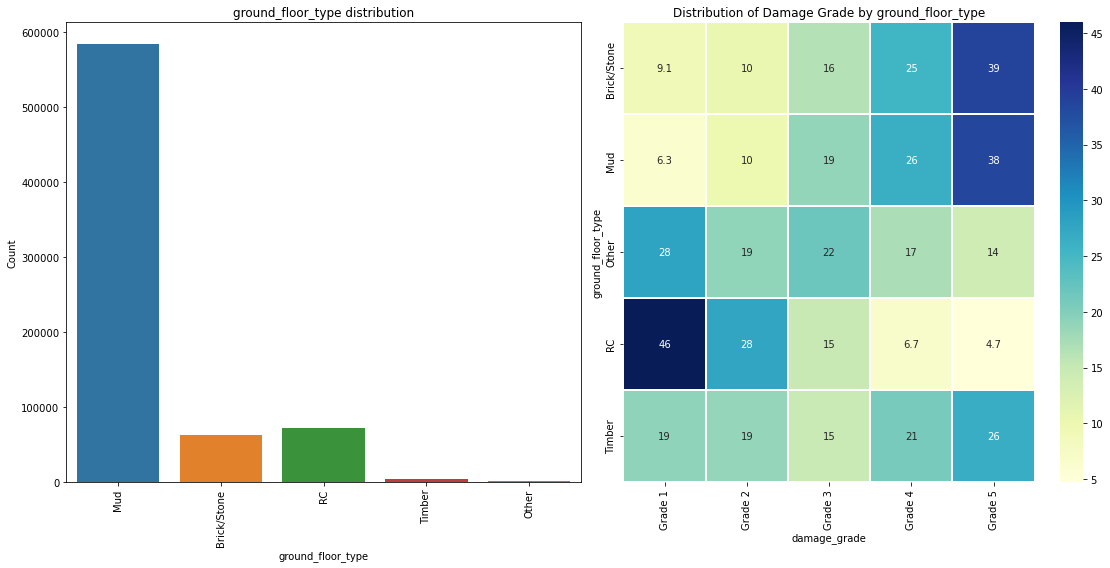

In [54]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(df["ground_floor_type"])
plt.title("ground_floor_type distribution")
plt.xlabel("ground_floor_type")
plt.ylabel("Count")
plt.xticks(rotation=90)


plt.subplot(1,2,2)
ax = df.groupby(['ground_floor_type','damage_grade']).size().reset_index(name='count')
#Set Index
ax=ax.set_index(["ground_floor_type","damage_grade"])
#Calculate the portion of Grade
ax=ax.groupby(level=0).apply(lambda x: 100* x/float(x.sum())).reset_index()
ax=pd.pivot_table(ax,index="ground_floor_type",columns="damage_grade",values="count")
sns.heatmap(data=ax,annot=True,linewidth=0.2,cmap="YlGnBu")
plt.title("Distribution of Damage Grade by ground_floor_type")       
plt.xticks(rotation=90)
plt.tight_layout()


Insight:</br>
1. This is a categorical variable that indicates the type of ground floor</br>
2. More impact happened for Mud type floor</br>

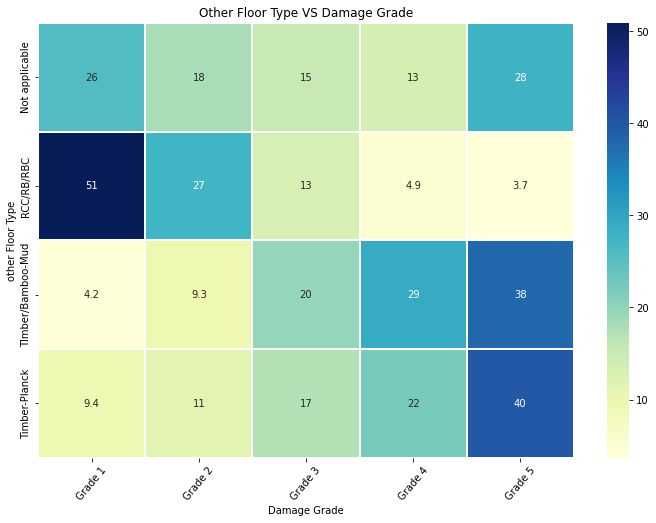

In [55]:
# Damage Grade vs Other Floor Type

ax=df.groupby(['other_floor_type','damage_grade']).size().reset_index(name='Count')
#Set Index
ax=ax.set_index(['other_floor_type','damage_grade'])

#Calculate the portion of Grade
ax=ax.groupby(level=0).apply(lambda x: 100*x/float(x.sum())).reset_index()

ax=pd.pivot(ax,columns='damage_grade',index='other_floor_type',values='Count')
plt.figure(figsize=(12,8))
sns.heatmap(data=ax,annot=True,linewidth=0.2,cmap="YlGnBu")
plt.xticks(rotation=50)
plt.title("Other Floor Type VS Damage Grade")
plt.xlabel("Damage Grade")
plt.ylabel("other Floor Type")
plt.show()

In [56]:
# bin_arr=['land_surface_condition', 'foundation_type', 'roof_type',
#        'ground_floor_type', 'other_floor_type', 'position',
#        'plan_configuration']
# j=0
# plt.figure(figsize=(5,5))
# for i in enumerate(bin_arr):
#     plt.subplot(4,4,i[0]+1)
#     data_s=df.loc[df[i[1]]==1]
#     sns.countplot(x=i[1],data=data_s,hue="damage_grade")
#     plt.title(i+"Distribution")
#     plt.ylabel("Count")
#     plt.xlabel(i)
    
# train_num=x_train.select_dtypes(exclude="object")
# cols=['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position','plan_configuration']

# for i in enumerate(cols):
#     plt.subplot(4,4,i[0]+1)
#     data_s=df.loc[df[i[1]]==1]
#     sns.countplot(x=i[1],data=data_s,hue="damage_grade")
#     plt.tight_layout()

Text(0.5, 0, 'has_superstructure_adobe_mud')

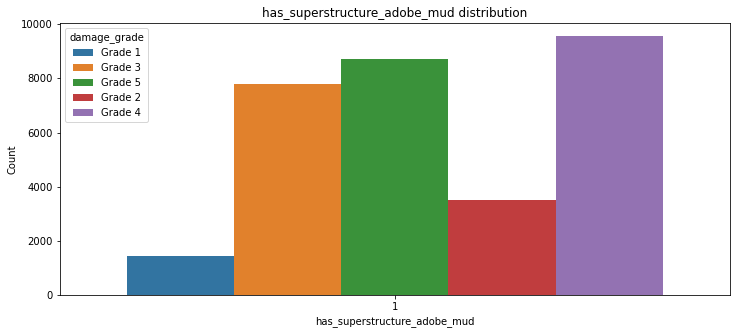

In [57]:
plt.figure(figsize=(12,5))
data_s=df.loc[df["has_superstructure_adobe_mud"]==1]
sns.countplot(x="has_superstructure_adobe_mud",data=data_s,hue="damage_grade")
plt.title("has_superstructure_adobe_mud distribution")
plt.ylabel("Count")
plt.xlabel("has_superstructure_adobe_mud")

Insight:</br>
    1.It indicates if the superstructure was made of Adobe/Mud</br>
    2. superstructure with Adobe/Mud had less impact on earthquake
    

Text(0.5, 0, 'has_superstructure_mud_mortar_brick')

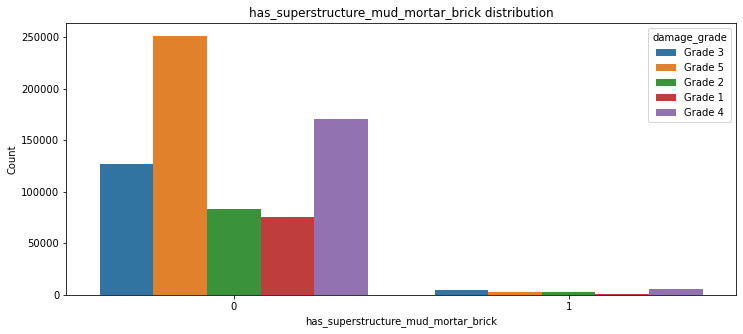

In [58]:
plt.figure(figsize=(12,5))
sns.countplot(x="has_superstructure_mud_mortar_brick",data=df,hue="damage_grade")
plt.title("has_superstructure_mud_mortar_brick distribution")
plt.ylabel("Count")
plt.xlabel("has_superstructure_mud_mortar_brick")

Insight:</br>
1. It indicates if the superstructure was made of Mud Mortar - Brick</br>
2. superstructure with Mud Mortar - Brick had less impact on earthquake

Text(0.5, 0, 'has_superstructure_cement_mortar_brick')

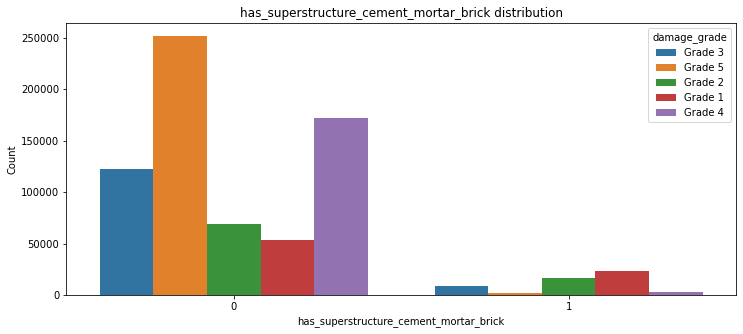

In [59]:
plt.figure(figsize=(12,5))
sns.countplot(x="has_superstructure_cement_mortar_brick",data=df,hue="damage_grade")
plt.title("has_superstructure_cement_mortar_brick distribution")
plt.ylabel("Count")
plt.xlabel("has_superstructure_cement_mortar_brick")

Insight:</br>
1. It indicates if the superstructure was made of Cement Mortar - Brick
2. superstructure with Cement Mortar - Brick had less impact on earthquake

Text(0.5, 0, 'has_superstructure_bamboo')

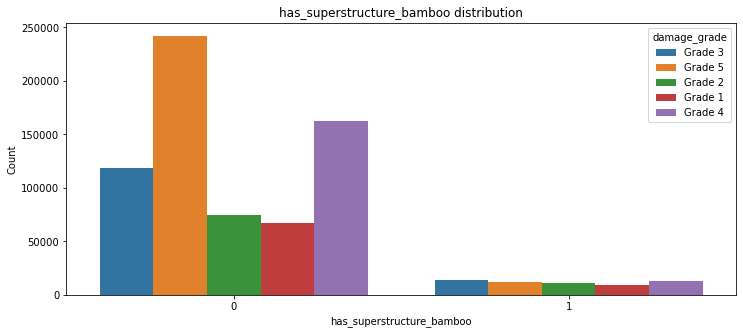

In [60]:
plt.figure(figsize=(12,5))
sns.countplot(x="has_superstructure_bamboo",data=df,hue="damage_grade")
plt.title("has_superstructure_bamboo distribution")
plt.ylabel("Count")
plt.xlabel("has_superstructure_bamboo")

Insight:</br>
1.It indicates if the superstructure was made of Bamboo</br>
2.superstructure made of Bamboo had less impact on earthquake

Text(0.5, 0, 'has_superstructure_rc_engineered')

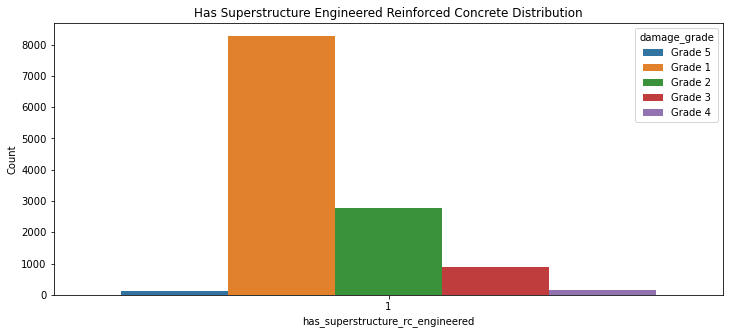

In [61]:
plt.figure(figsize=(12,5))
data_s=df.loc[df["has_superstructure_rc_engineered"]==1]
sns.countplot(x="has_superstructure_rc_engineered",data=data_s,hue="damage_grade")
plt.title("Has Superstructure Engineered Reinforced Concrete Distribution")
plt.ylabel("Count")
plt.xlabel("has_superstructure_rc_engineered")

Insight:</br>
1.It indicates if the superstructure was made of engineered reinforced concrete</br>
2. superstructure made of engineered reinforced concrete had less impact on earthquake

Text(0.5, 0, 'has_superstructure_other')

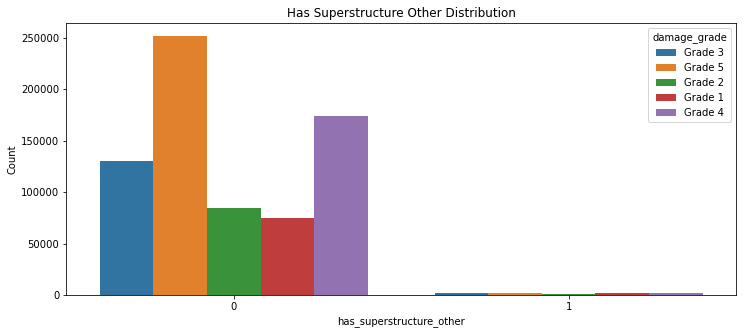

In [62]:
plt.figure(figsize=(12,5))
sns.countplot(x="has_superstructure_other",data=df,hue="damage_grade")
plt.title("Has Superstructure Other Distribution")
plt.ylabel("Count")
plt.xlabel("has_superstructure_other")

Insight:</br>
1.It indicates if the superstructure was made of any other material</br>


In [63]:
# reference
arr_new=["has_superstructure_adobe_mud","has_superstructure_mud_mortar_stone","has_superstructure_stone_flag","has_superstructure_cement_mortar_stone","has_superstructure_mud_mortar_brick","has_superstructure_cement_mortar_brick","has_superstructure_timber","has_superstructure_bamboo","has_superstructure_rc_non_engineered","has_superstructure_rc_engineered","has_superstructure_other"]
new_dict={}
df.shape

(723524, 27)

In [64]:
for i in arr_new:
    new_dict[i]=[df[i].value_counts()[1]] 

In [65]:
#new_dict=pd.DataFrame(new_dict,columns=["Super_Structure_Type","Yes"])
#df["has_superstructure_adobe_mud"].value_counts()
new_dict
#df_dict=pd.DataFrame(new_dict,columns=["Type","Yes"])
df_dict=pd.DataFrame(new_dict)
df_dict=df_dict.T
df_dict=df_dict.reset_index()
df_dict.columns=["Super_structure_Type","Buildings_Having_superstructure"]
df_dict

,Super_structure_Type,Buildings_Having_superstructure
0,has_superstructure_adobe_mud,31011
1,has_superstructure_mud_mortar_stone,574546
2,has_superstructure_stone_flag,25507
3,has_superstructure_cement_mortar_stone,12000
4,has_superstructure_mud_mortar_brick,17221
5,has_superstructure_cement_mortar_brick,53679
6,has_superstructure_timber,189459
7,has_superstructure_bamboo,59002
8,has_superstructure_rc_non_engineered,29631
9,has_superstructure_rc_engineered,12218


In [66]:
df_dict["Buildings_without_superstructure"]=723524-df_dict["Buildings_Having_superstructure"]
df_dict

,Super_structure_Type,Buildings_Having_superstructure,Buildings_without_superstructure
0,has_superstructure_adobe_mud,31011,692513
1,has_superstructure_mud_mortar_stone,574546,148978
2,has_superstructure_stone_flag,25507,698017
3,has_superstructure_cement_mortar_stone,12000,711524
4,has_superstructure_mud_mortar_brick,17221,706303
5,has_superstructure_cement_mortar_brick,53679,669845
6,has_superstructure_timber,189459,534065
7,has_superstructure_bamboo,59002,664522
8,has_superstructure_rc_non_engineered,29631,693893
9,has_superstructure_rc_engineered,12218,711306


In [67]:
df_dict["Buildings_Having_superstructure"].values

array([ 31011, 574546,  25507,  12000,  17221,  53679, 189459,  59002,
        29631,  12218,   8992], dtype=int64)

<BarContainer object of 11 artists>

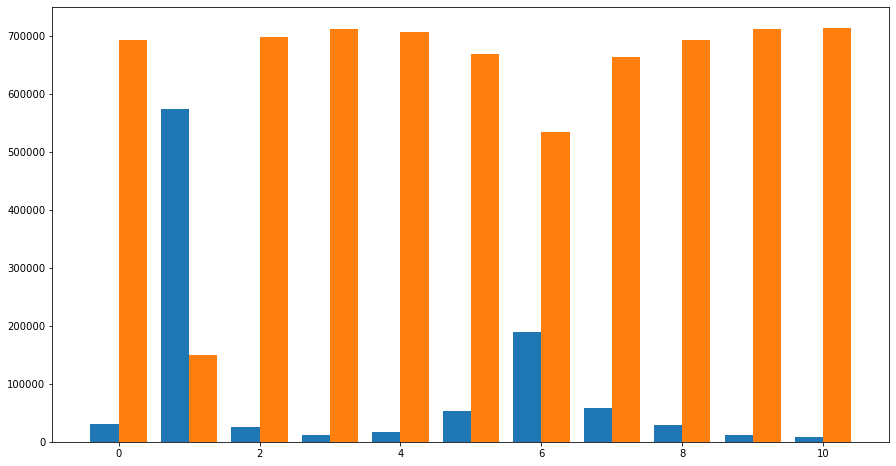

In [68]:
# plt.bar(x="Super_structure_Type",data=df_dict,height=[["Buildings_Having_superstructure","Buildings_without_superstructure"]])



# fig, ax = plt.subplots(figsize=(12, 8))
# x = np.arange(len(df.Super_structure_Type.unique()))

# # Define bar width. We'll use this to offset the second bar.
# bar_width = 0.4

# # Note we add the `width` parameter now which sets the width of each bar.
# b1 = ax.bar(x, df["Buildings_Having_superstructure"],
#             width=bar_width)
# # Same thing, but offset the x by the width of the bar.
# b2 = ax.bar(x + bar_width, df["Buildings_without_superstructure"],
#             width=bar_width)



x = np.arange(11)
y1 = df_dict["Buildings_Having_superstructure"].values
y2 = df_dict["Buildings_without_superstructure"].values
width = 0.40

plt.figure(figsize=(15,8))
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width)
plt.bar(x+0.2, y2, width)

In [69]:
df_dict.columns

Index(['Super_structure_Type', 'Buildings_Having_superstructure',
       'Buildings_without_superstructure'],
      dtype='object')

# 5. Preprocessing

# 5a. Handling of Outliers

In [70]:
Raw_Data=df.copy()

In [71]:
Raw_Data.head(3)

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
0,1.200000e+11,12,1207,120703,1,9.0,288.0,9.0,Flat,Other,...,0,0,0,0,0,1,0,0,0,Grade 3
1,1.200000e+11,12,1207,120703,1,15.0,364.0,9.0,Flat,Other,...,0,0,0,0,0,1,0,0,0,Grade 5
2,1.200000e+11,12,1207,120703,1,20.0,384.0,9.0,Flat,Other,...,0,0,0,0,0,0,0,0,0,Grade 2


In [72]:
Raw_Data.columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'damage_grade'],
      dtype='object')

In [73]:
# Continous Features in the dataset
Continous_col=Raw_Data[['age_building', 'plinth_area_sq_ft','height_ft_pre_eq']]
Disctrete_col=Raw_Data.drop(Continous_col.columns,axis=1)
Disctrete_col=Disctrete_col.select_dtypes(exclude="object")
Disctrete_col.drop(["building_id","district_id","vdcmun_id","ward_id"],axis=1,inplace=True)


In [74]:
Continous_col=Continous_col.columns
Disctrete_col=Disctrete_col.columns
print("continous:",Disctrete_col)
print("Discrete:",Disctrete_col)

continous: Index(['count_floors_pre_eq', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other'],
      dtype='object')
Discrete: Index(['count_floors_pre_eq', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other'],
      dtype='object')


In [75]:
# For Discrete numeric columns, we will check for the unique values
Disctrete_col.nunique()

12

In [76]:
# as we know, Except count_floors_pre_eq , all other feature has 0's & 1s
# We will check the value count as weel for the count_floors_pre_eq

In [77]:
Raw_Data["count_floors_pre_eq"].value_counts()

2    443678
3    155955
1    115867
4      6026
5      1554
6       331
7        88
9        13
8        12
Name: count_floors_pre_eq, dtype: int64

Note: There is no abnormalities in the data

**Handling of Outliers in age_building column**

In [78]:
# Handling of Outliers in the Continous_col
Raw_Data["age_building"].min()
Raw_Data["age_building"].max()

999.0

In [79]:
Raw_Data.loc[Raw_Data["age_building"]==999]

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
2004,1.200000e+11,12,1208,120802,2,999.0,225.0,25.0,Flat,Bamboo/Timber,...,0,0,0,0,1,1,0,0,0,Grade 2
6113,1.210000e+11,12,1207,120707,2,999.0,347.0,17.0,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 3
12068,1.220000e+11,12,1207,120706,2,999.0,540.0,16.0,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,1,0,0,0,0,Grade 5
12090,1.220000e+11,12,1207,120706,2,999.0,540.0,18.0,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,1,0,0,0,0,Grade 4
12124,1.220000e+11,12,1207,120706,1,999.0,540.0,8.0,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,1,0,0,0,0,Grade 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757638,3.660000e+11,36,3608,360801,2,999.0,280.0,16.0,Flat,Mud mortar-Stone/Brick,...,1,0,0,0,0,0,0,0,0,Grade 4
757705,3.660000e+11,36,3608,360801,2,999.0,310.0,14.0,Flat,Mud mortar-Stone/Brick,...,1,0,0,0,0,0,0,0,0,Grade 5
757723,3.660000e+11,36,3608,360801,2,999.0,320.0,16.0,Flat,Mud mortar-Stone/Brick,...,1,0,0,0,0,0,0,0,0,Grade 4
757789,3.660000e+11,36,3608,360801,2,999.0,240.0,15.0,Flat,Mud mortar-Stone/Brick,...,1,0,0,0,0,0,0,0,0,Grade 4


There are 2666 rows with age as 999. as per google search found there was no this much buildings with 999 age. So we will handle it by IQR method

With winsorizing, any value of a variable above or below a percentile k on each side of the variables<br>' distribution is replaced with the value of the k-th percentile itself.

There are 2666 rows with age as 999. as per google search found there was no this much buildings with 999 age. So we will handle it by winsorize method

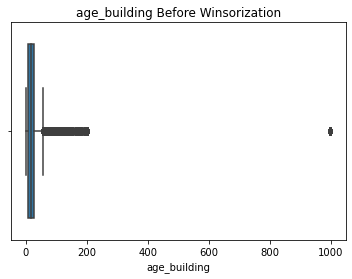

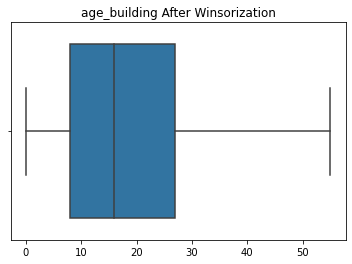

In [80]:
#Data source
name = "age_building"
data = Raw_Data[name]

#Before winsorization
sns.boxplot(data)
plt.title("{} Before Winsorization".format(name))
plt.show()

#Winsorization
winsorized_data = winsorize(data,(0, 0.05))

#After winsorization
sns.boxplot(winsorized_data)
plt.title("{} After Winsorization".format(name))
plt.show()

#Replace data in dataset
Raw_Data[name] = winsorized_data

**Handling of Outliers in height_ft_pre_eq & plinth_area_sq_ft columns**

In [81]:
Raw_Data["height_ft_pre_eq"].max()

99.0

In [82]:
Raw_Data["height_ft_pre_eq"].min()

6.0

In [83]:
Raw_Data["height_ft_pre_eq"].max()

99.0

Since the max & min values of column "height_ft_pre_eq" are genuine kind of ouliers, we are using log transfomation techniques to handle the outliers.
Log transformation is a data transformation method in which it replaces each variable x with a log(x)

				Plinth Area & Height before log tranformation


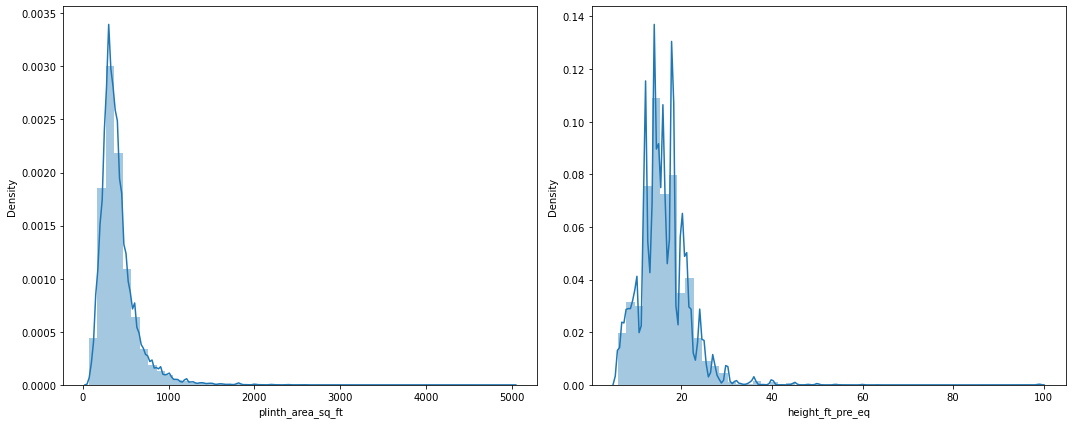

In [84]:
print("\t\t\t\tPlinth Area & Height before log tranformation")
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.distplot(Raw_Data['plinth_area_sq_ft'],kde=True)
plt.subplot(1,2,2)
sns.distplot(Raw_Data['height_ft_pre_eq'],kde=True)
plt.tight_layout()

We can see that due to the presence of outliers, plot distriution plot is skewed

				Plinth Area & Height after log tranformation


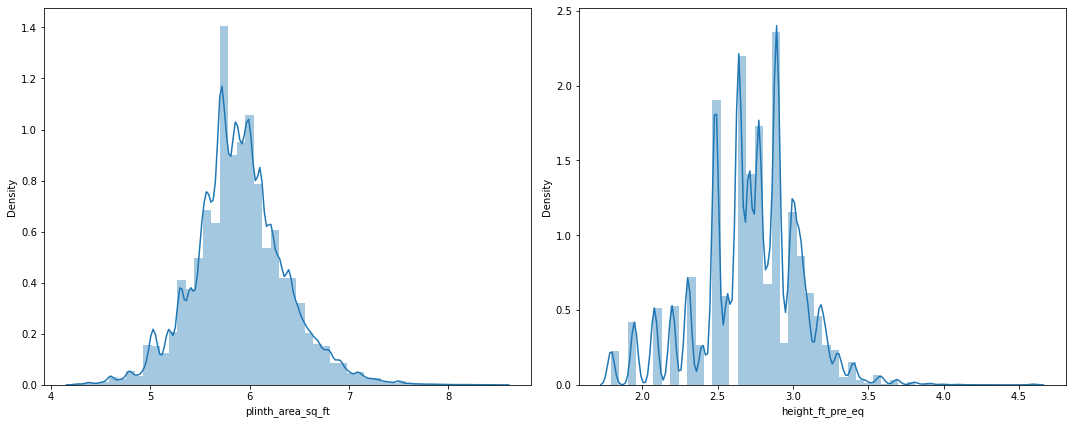

In [85]:
print("\t\t\t\tPlinth Area & Height after log tranformation")
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
Raw_Data['plinth_area_sq_ft'] = np.log(Raw_Data['plinth_area_sq_ft'])
sns.distplot(Raw_Data['plinth_area_sq_ft'],kde=True)
plt.subplot(1,2,2)
Raw_Data['height_ft_pre_eq'] = np.log(Raw_Data['height_ft_pre_eq'])
sns.distplot(Raw_Data['height_ft_pre_eq'],kde=True)
plt.tight_layout()

By the use of log transfomration techniques, outliers got reduced. and our skewdw distribution got tend towards gaussian distribution.

In [86]:
Raw_Data.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
0,1.200000e+11,12,1207,120703,1,9.0,5.662960,2.197225,Flat,Other,...,0,0,0,0,0,1,0,0,0,Grade 3
1,1.200000e+11,12,1207,120703,1,15.0,5.897154,2.197225,Flat,Other,...,0,0,0,0,0,1,0,0,0,Grade 5
2,1.200000e+11,12,1207,120703,1,20.0,5.950643,2.197225,Flat,Other,...,0,0,0,0,0,0,0,0,0,Grade 2
3,1.200000e+11,12,1207,120703,1,20.0,5.743003,2.197225,Flat,Other,...,0,0,0,0,0,0,0,0,0,Grade 2
4,1.200000e+11,12,1207,120703,1,30.0,5.730100,2.197225,Flat,Other,...,0,0,0,0,0,0,0,0,0,Grade 1


# 5b.Feature Engineering

In [87]:
# Creating new feature risk_based_on_age
Raw_Data["age_building"].max()

55.0

In [88]:
np.linspace(0,55,4)

array([ 0.        , 18.33333333, 36.66666667, 55.        ])

In [89]:
# def risk_based_on_age(x):
#     if 0<=x<18:
#         return "Low Risk"
#     elif 18<=x<36:
#         return "Medium Risk"
#     else:
#         return "High Risk"

In [90]:
# Raw_Data["risk_based_on_age"]=Raw_Data["age_building"].apply(lambda x: risk_based_on_age(x))

In [91]:
# Raw_Data.head(3)

In [92]:
# # Creating new feature "Type of Building"
# def Type_of_Building(x):
#     if 0<=x<4:
#         return "Low Rise Building"
#     elif 4<=x<7:
#         return "Medium Rise Building"
#     else:
#         return "High Rise Building"

In [93]:
# Raw_Data["Type_of_Building"]=Raw_Data["count_floors_pre_eq"].apply(lambda x: Type_of_Building(x))

In [94]:
# Raw_Data.head(3)

In [95]:
# cat=Raw_Data.select_dtypes(include="object")
# cat.columns
# cat_y=cat["damage_grade"]
# # cat_x=cat.drop("damage_grade",axis=1)

In [96]:
# # TO check the correlation between Caegorical Features

# def cramers_v(x, y):
#     confusion_matrix = pd.crosstab(x,y)
#     chi2 = scipy.stats.chi2_contingency(confusion_matrix)[0]
#     n = confusion_matrix.sum().sum()
#     phi2 = chi2/n
#     r,k = confusion_matrix.shape
#     phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
#     rcorr = r-((r-1)**2)/(n-1)
#     kcorr = k-((k-1)**2)/(n-1)
#     return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [97]:
# cramers_v(Raw_Data["count_floors_pre_eq"],Raw_Data["Type_of_Building"])

In [98]:
# cramers_v(Raw_Data["age_building"],Raw_Data["risk_based_on_age"])

Similarly to correlation, the output is in the range of [0,1], where 0 means no association and 1 is full association. (Unlike correlation, there are no negative values, as there’s no such thing as a negative association. Either there is, or there isn’t)

Age Range: Bin
---------------
 0 -  9  : 0
10 - 19  : 1
20 - 29  : 2
30 - 39  : 3
40 - 49  : 4
50 - 59  : 5
60 - 69  : 6

In [99]:
# Creating age bins

Raw_Data['Age_bin_round'] = np.array(np.floor(np.array(Raw_Data['age_building']) / 10.))

In [100]:
#data['standardized'] = (data['value'] - data['value'].mean()) / data['value'].std()

In [101]:
# Creating New feature, Constructed year

#Raw_Data['Constructed_year'] = 2015-Raw_Data['age_building'].astype('int')

In [102]:
#Raw_Data['Constructed_year'].dtype

In [103]:
#Raw_Data['z_score_plinth_area'] = (Raw_Data['plinth_area_sq_ft'] - Raw_Data['plinth_area_sq_ft'].mean()) / Raw_Data['plinth_area_sq_ft'].std()

# 5c. Encoding the Categorical columns

In [104]:
Raw_Data.isna().sum()

building_id                               0
district_id                               0
vdcmun_id                                 0
ward_id                                   0
count_floors_pre_eq                       0
age_building                              0
plinth_area_sq_ft                         0
height_ft_pre_eq                          0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [105]:
Raw_Data.select_dtypes(include="object").columns

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'damage_grade'],
      dtype='object')

In [106]:
#Raw_Data["risk_based_on_age"].value_counts()

In [107]:
# Label Encode the target Variable

ref_df=Raw_Data.copy()

lbl=LabelEncoder()
for i in ['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'damage_grade']:
    ref_df[i]=lbl.fit_transform(ref_df[i])

In [108]:
ref_df

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,...,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade,Age_bin_round
0,1.200000e+11,12,1207,120703,1,9.0,5.662960,2.197225,0,3,...,0,0,0,0,1,0,0,0,2,0.0
1,1.200000e+11,12,1207,120703,1,15.0,5.897154,2.197225,0,3,...,0,0,0,0,1,0,0,0,4,1.0
2,1.200000e+11,12,1207,120703,1,20.0,5.950643,2.197225,0,3,...,0,0,0,0,0,0,0,0,1,2.0
3,1.200000e+11,12,1207,120703,1,20.0,5.743003,2.197225,0,3,...,0,0,0,0,0,0,0,0,1,2.0
4,1.200000e+11,12,1207,120703,1,30.0,5.730100,2.197225,0,3,...,0,0,0,0,0,0,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762101,3.670000e+11,36,3603,360302,2,55.0,5.105945,2.890372,0,2,...,0,0,0,0,0,0,0,0,4,5.0
762102,3.670000e+11,36,3603,360302,2,35.0,5.834811,2.890372,0,2,...,0,0,0,0,0,0,0,0,4,3.0
762103,3.670000e+11,36,3603,360302,2,35.0,5.834811,2.890372,0,2,...,0,0,0,0,0,0,0,0,4,3.0
762104,3.670000e+11,36,3603,360302,2,19.0,5.723585,2.890372,0,2,...,0,0,0,0,0,0,0,0,4,1.0


# 5d. Feature Importance using Random Forest Classifier


In [109]:
y=ref_df["damage_grade"]
x=ref_df.drop("damage_grade",axis=1)

In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [111]:
rdm=RandomForestClassifier()
rdm.fit(x_train,y_train)
feat_importances=pd.Series(rdm.feature_importances_,index=x.columns).sort_values(ascending=False)*100

			Feature importance using Random Forest Classifier


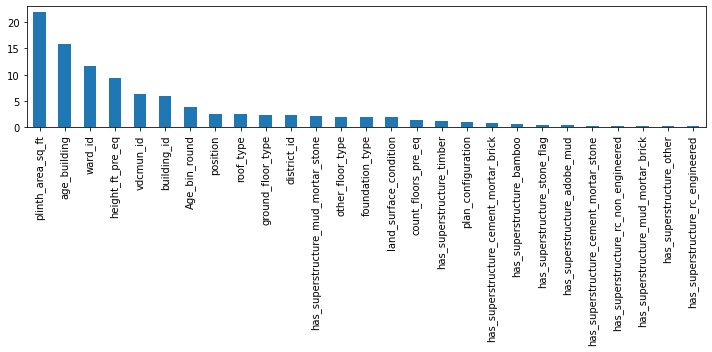

In [112]:
#We can drop columns with Low Feature importance

print("\t\t\tFeature importance using Random Forest Classifier")
plt.figure(figsize=(10,5))
feat_importances.plot(kind='bar')
plt.tight_layout()
plt.show()

Insight: we will drop the features with low importance

In [113]:
feat_importances

plinth_area_sq_ft                         21.890021
age_building                              15.881252
ward_id                                   11.593541
height_ft_pre_eq                           9.354895
vdcmun_id                                  6.301513
building_id                                5.944913
Age_bin_round                              3.883855
position                                   2.625001
roof_type                                  2.573618
ground_floor_type                          2.353889
district_id                                2.281393
has_superstructure_mud_mortar_stone        2.225935
other_floor_type                           2.033773
foundation_type                            1.928557
land_surface_condition                     1.923455
count_floors_pre_eq                        1.410553
has_superstructure_timber                  1.133758
plan_configuration                         0.963242
has_superstructure_cement_mortar_brick     0.880518
has_superstr

# 5e. Feature Reduction

Text(0.5, 1.0, 'Correlation between Numerical Features')

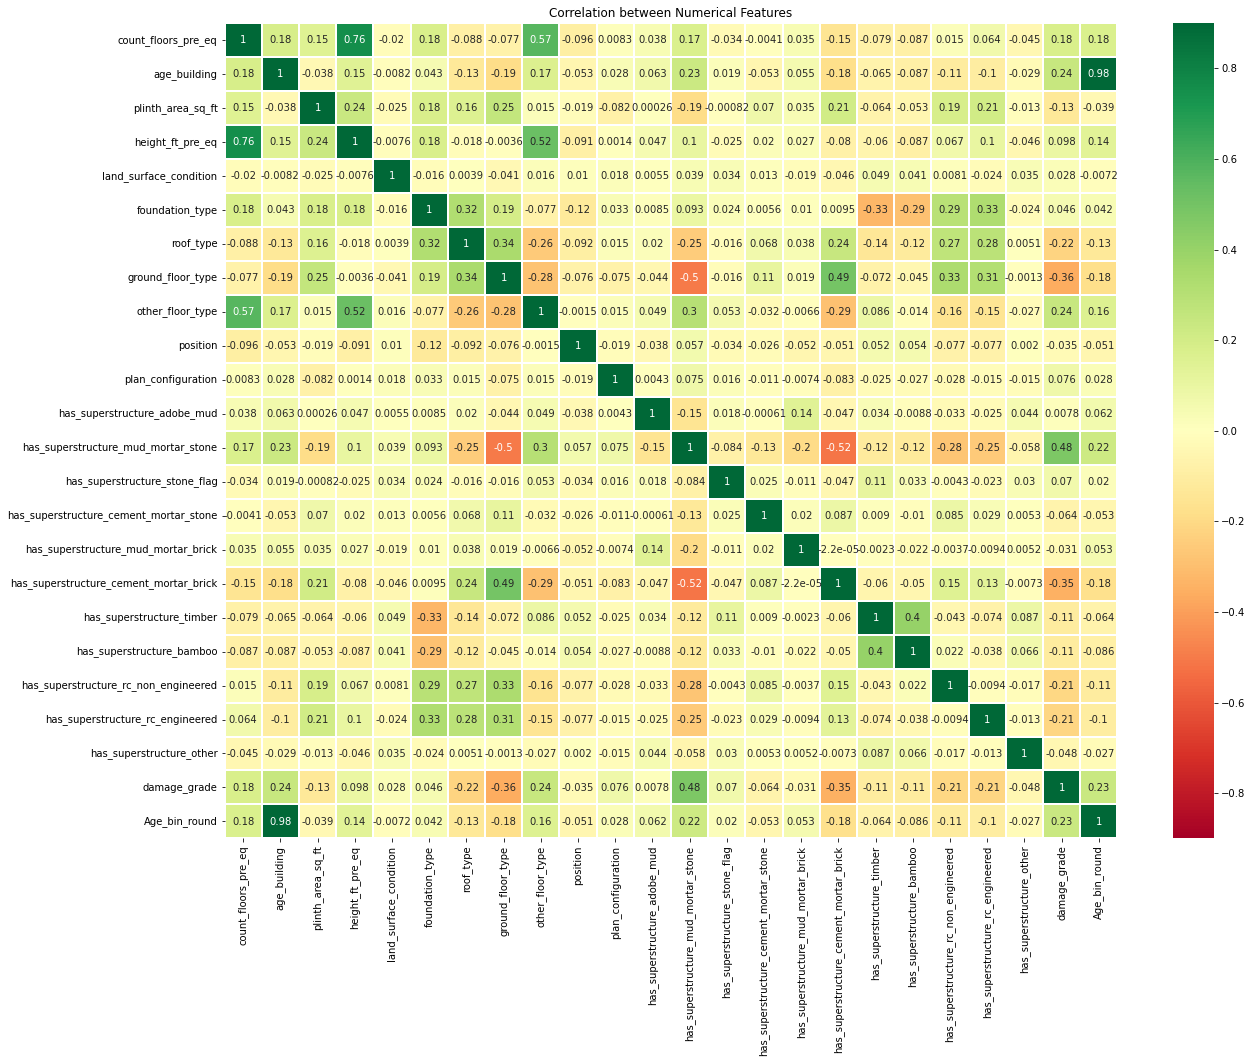

In [114]:
# we will check the correlation between features using heatmap
df_corr=ref_df.copy()
df_corr.drop(["building_id","district_id","vdcmun_id","ward_id"],axis=1,inplace=True)
corr_matrix=df_corr.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,linewidths=0.2,cmap='RdYlGn',annot=True,vmin=-0.9,vmax=0.9)
plt.title("Correlation between Numerical Features")

1. by looking into te heatmap, we can see that count_floors_pre_eq& height_ft_pre_eq have high positive correlatio, </br>
so by looking to feature importance, we can go for droping of count_floors_pre_eq  column
2. We can go for droping of ID columns as well


In [115]:
Raw_Data.isna().sum()
backup=Raw_Data.copy()

In [116]:
# Droping the Id columns & count of floor
Raw_Data=backup.copy()
Raw_Data.drop(['building_id', 'district_id', 'vdcmun_id', 'ward_id','Age_bin_round'
       ],axis=1,inplace=True)

In [117]:
# Checking for the relevance of binary columns
super_structure=['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other']

In [118]:
arr={}
for i in super_structure:
    arr[i]=Raw_Data[i].sum()/len(Raw_Data)*100
arr

{'has_superstructure_adobe_mud': 4.286105229404968,
 'has_superstructure_mud_mortar_stone': 79.40939070438576,
 'has_superstructure_stone_flag': 3.52538409230378,
 'has_superstructure_cement_mortar_stone': 1.658548990772939,
 'has_superstructure_mud_mortar_brick': 2.380156014175065,
 'has_superstructure_cement_mortar_brick': 7.41910427297505,
 'has_superstructure_timber': 26.185586103570856,
 'has_superstructure_bamboo': 8.154808962798747,
 'has_superstructure_rc_non_engineered': 4.09537209546608,
 'has_superstructure_rc_engineered': 1.6886792974386475,
 'has_superstructure_other': 1.2428060437525223}

In [119]:
# # among the above , we can conclude that Only 'has_superstructure_mud_mortar_stone' has more importance, We also found it through 
# feature importance method as well.

In [120]:
# Droping the columns having less feature importance
Raw_Data.drop(['has_superstructure_timber',
       'plan_configuration', 'has_superstructure_cement_mortar_brick',
       'has_superstructure_bamboo', 'has_superstructure_stone_flag',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_rc_non_engineered', 'has_superstructure_other',
       'has_superstructure_rc_engineered'],axis=1,inplace=True)

In [121]:
Raw_Data.head()

,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,has_superstructure_mud_mortar_stone,damage_grade
0,1,9.0,5.662960,2.197225,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,1,Grade 3
1,1,15.0,5.897154,2.197225,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,1,Grade 5
2,1,20.0,5.950643,2.197225,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,1,Grade 2
3,1,20.0,5.743003,2.197225,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,1,Grade 2
4,1,30.0,5.730100,2.197225,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,1,Grade 1


In [122]:
Raw_Data.isna().sum()

count_floors_pre_eq                    0
age_building                           0
plinth_area_sq_ft                      0
height_ft_pre_eq                       0
land_surface_condition                 0
foundation_type                        0
roof_type                              0
ground_floor_type                      0
other_floor_type                       0
position                               0
has_superstructure_mud_mortar_stone    0
damage_grade                           0
dtype: int64

# Encoding

In [123]:
cat_col=Raw_Data.select_dtypes(include="object").columns

In [124]:
# Checking the categorical feature unique values
Raw_Data[cat_col].nunique()

land_surface_condition    3
foundation_type           5
roof_type                 3
ground_floor_type         5
other_floor_type          4
position                  4
damage_grade              5
dtype: int64

In [125]:
Raw_Data["damage_grade"].value_counts()

Grade 5    253777
Grade 4    175797
Grade 3    131894
Grade 2     85458
Grade 1     76598
Name: damage_grade, dtype: int64

**Label Encoding the Damage grade Feature**

In [126]:
# Label Encoding the Damage grade Feature
lbl=LabelEncoder()
Raw_Data["damage_grade"]=lbl.fit_transform(Raw_Data["damage_grade"])

In [127]:
Raw_Data["damage_grade"].value_counts()

4    253777
3    175797
2    131894
1     85458
0     76598
Name: damage_grade, dtype: int64

In [128]:
Raw_Data.isna().sum()

count_floors_pre_eq                    0
age_building                           0
plinth_area_sq_ft                      0
height_ft_pre_eq                       0
land_surface_condition                 0
foundation_type                        0
roof_type                              0
ground_floor_type                      0
other_floor_type                       0
position                               0
has_superstructure_mud_mortar_stone    0
damage_grade                           0
dtype: int64

**Seperating Dependent and independent Features**

In [ ]:
X = Raw_Data.drop(['damage_grade'],axis=1)
y= Raw_Data['damage_grade']

**Encoding the categorical Features uing Catboost Encoder**

In [ ]:
import category_encoders as ce 
# # Define catboost encoder
cbe_encoder = ce.cat_boost.CatBoostEncoder()
  
# # Fit encoder and transform the features
cbe_encoder.fit(X, y)
X = cbe_encoder.transform(X)

# Imbalanced Data Handling

**Using Repeated Edited Nearest Neighbours** 

In [ ]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours # doctest : +NORMALIZE_WHITESPACE

renn = RepeatedEditedNearestNeighbours()
X_res, y_res = renn.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

# Splitting the data into Train & Test Set

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.3,random_state=34,stratify=y_res)

# Fitting the Model

In [ ]:
# classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

# Evaluating the Model

In [ ]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))